
## IMPORTING REQUIRED LIBRARIES




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
import joblib

## Reading the csv files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv ('/content/drive/MyDrive/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


## Data Pre-processing

In [4]:
df.shape

(145460, 23)

In [5]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [6]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [7]:
df=df.drop('Cloud9am', axis = 'columns')
df=df.drop('Cloud3pm', axis = 'columns')
df=df.drop('Sunshine', axis = 'columns')
df=df.drop('Evaporation', axis = 'columns')
df=df.drop('WindGustDir', axis = 'columns')
df=df.drop('WindGustSpeed', axis = 'columns')
df=df.drop('WindDir9am', axis = 'columns')
df=df.drop('Pressure9am', axis = 'columns')
df=df.drop('Pressure3pm', axis = 'columns')
#df=df.drop('Location', axis = 'columns')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,WNW,20.0,24.0,71.0,22.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WSW,4.0,22.0,44.0,25.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,19.0,26.0,38.0,30.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,E,11.0,9.0,45.0,16.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NW,7.0,20.0,82.0,33.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,ENE,13.0,11.0,51.0,24.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,N,13.0,9.0,56.0,21.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,WNW,9.0,9.0,53.0,24.0,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,N,13.0,7.0,51.0,24.0,15.1,26.0,No,No


In [8]:
df.isnull().sum()

Date               0
Location           0
MinTemp         1485
MaxTemp         1261
Rainfall        3261
WindDir3pm      4228
WindSpeed9am    1767
WindSpeed3pm    3062
Humidity9am     2654
Humidity3pm     4507
Temp9am         1767
Temp3pm         3609
RainToday       3261
RainTomorrow    3267
dtype: int64

In [9]:
df.dtypes

Date             object
Location         object
MinTemp         float64
MaxTemp         float64
Rainfall        float64
WindDir3pm       object
WindSpeed9am    float64
WindSpeed3pm    float64
Humidity9am     float64
Humidity3pm     float64
Temp9am         float64
Temp3pm         float64
RainToday        object
RainTomorrow     object
dtype: object

In [10]:
df["RainTomorrow"].fillna("No", inplace = True)
df["WindDir3pm"].fillna("SE", inplace = True)
df["RainToday"].fillna("NO", inplace = True)

In [11]:
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%dT", errors = "coerce")

In [12]:
df["Date_month"] = df["Date"].dt.month
df["Date_day"] = df["Date"].dt.day
df["Rain_Tomorrow"] = df["RainTomorrow"]
df=df.drop('RainTomorrow', axis = 'columns')
df=df.drop('Date', axis = 'columns')
df

,Location,MinTemp,MaxTemp,Rainfall,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,Date_month,Date_day,Rain_Tomorrow
0,Albury,13.4,22.9,0.6,WNW,20.0,24.0,71.0,22.0,16.9,21.8,No,12,1,No
1,Albury,7.4,25.1,0.0,WSW,4.0,22.0,44.0,25.0,17.2,24.3,No,12,2,No
2,Albury,12.9,25.7,0.0,WSW,19.0,26.0,38.0,30.0,21.0,23.2,No,12,3,No
3,Albury,9.2,28.0,0.0,E,11.0,9.0,45.0,16.0,18.1,26.5,No,12,4,No
4,Albury,17.5,32.3,1.0,NW,7.0,20.0,82.0,33.0,17.8,29.7,No,12,5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,ENE,13.0,11.0,51.0,24.0,10.1,22.4,No,6,21,No
145456,Uluru,3.6,25.3,0.0,N,13.0,9.0,56.0,21.0,10.9,24.5,No,6,22,No
145457,Uluru,5.4,26.9,0.0,WNW,9.0,9.0,53.0,24.0,12.5,26.1,No,6,23,No
145458,Uluru,7.8,27.0,0.0,N,13.0,7.0,51.0,24.0,15.1,26.0,No,6,24,No


In [13]:
df.isnull().sum()

Location            0
MinTemp          1485
MaxTemp          1261
Rainfall         3261
WindDir3pm          0
WindSpeed9am     1767
WindSpeed3pm     3062
Humidity9am      2654
Humidity3pm      4507
Temp9am          1767
Temp3pm          3609
RainToday           0
Date_month          0
Date_day            0
Rain_Tomorrow       0
dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["WindDir3pm"] = le.fit_transform(df["WindDir3pm"])
df["RainToday"] = le.fit_transform(df["RainToday"])
df["Rain_Tomorrow"] = le.fit_transform(df["Rain_Tomorrow"])
df["Location"] = le.fit_transform(df["Location"])
df

,Location,MinTemp,MaxTemp,Rainfall,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,Date_month,Date_day,Rain_Tomorrow
0,2,13.4,22.9,0.6,14,20.0,24.0,71.0,22.0,16.9,21.8,1,12,1,0
1,2,7.4,25.1,0.0,15,4.0,22.0,44.0,25.0,17.2,24.3,1,12,2,0
2,2,12.9,25.7,0.0,15,19.0,26.0,38.0,30.0,21.0,23.2,1,12,3,0
3,2,9.2,28.0,0.0,0,11.0,9.0,45.0,16.0,18.1,26.5,1,12,4,0
4,2,17.5,32.3,1.0,7,7.0,20.0,82.0,33.0,17.8,29.7,1,12,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,23.4,0.0,1,13.0,11.0,51.0,24.0,10.1,22.4,1,6,21,0
145456,41,3.6,25.3,0.0,3,13.0,9.0,56.0,21.0,10.9,24.5,1,6,22,0
145457,41,5.4,26.9,0.0,14,9.0,9.0,53.0,24.0,12.5,26.1,1,6,23,0
145458,41,7.8,27.0,0.0,3,13.0,7.0,51.0,24.0,15.1,26.0,1,6,24,0


In [15]:
df.isnull().sum()

Location            0
MinTemp          1485
MaxTemp          1261
Rainfall         3261
WindDir3pm          0
WindSpeed9am     1767
WindSpeed3pm     3062
Humidity9am      2654
Humidity3pm      4507
Temp9am          1767
Temp3pm          3609
RainToday           0
Date_month          0
Date_day            0
Rain_Tomorrow       0
dtype: int64

In [16]:
df = df.fillna(value = df['MinTemp'].mean())
df = df.fillna(value = df['MaxTemp'].mean())
df = df.fillna(value = df['Rainfall'].mean())
df = df.fillna(value = df['WindSpeed3pm'].mean())
df = df.fillna(value = df['WindSpeed9am'].mean())
df = df.fillna(value = df['Humidity9am'].mean())
df = df.fillna(value = df['Humidity3pm'].mean())
df = df.fillna(value = df['Temp9am'].mean())
df = df.fillna(value = df['Temp3pm'].mean())

In [17]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
Date_month       0
Date_day         0
Rain_Tomorrow    0
dtype: int64

## Correlations between features

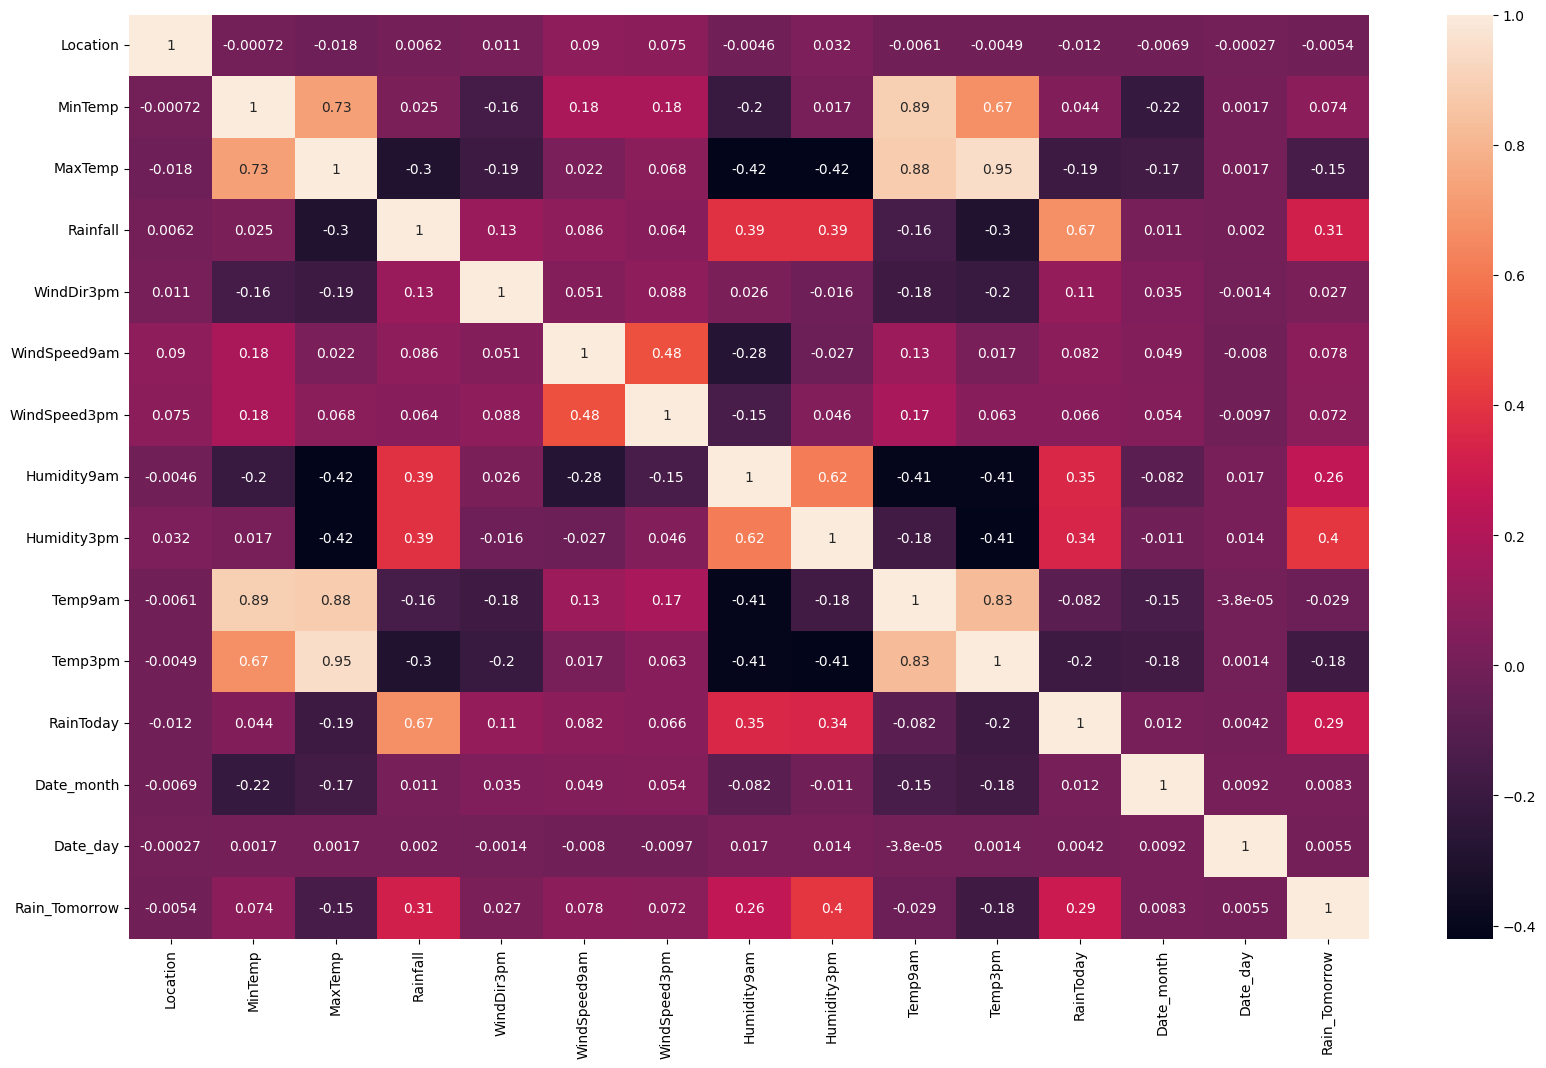

In [18]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(20,12))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [19]:
df["Rain_Tomorrow"].value_counts()
#sns.countplot(df['Rain_Tomorrow'])

0    113583
1     31877
Name: Rain_Tomorrow, dtype: int64

In [20]:
#sns.pairplot(df,hue='Rain_Tomorrow')

## Machine learning

In [21]:
X = df.drop(["Rain_Tomorrow"], axis = 1)
y = df["Rain_Tomorrow"]

In [22]:
from imblearn.over_sampling import RandomOverSampler
rs = RandomOverSampler(random_state=0)
X_res, y_res = rs.fit_resample(X, y)
print('original dataset shape %s' %Counter(y))
print('After oversampling dataset shape %s' %Counter(y_res))
#sns.countplot(y_res)

original dataset shape Counter({0: 113583, 1: 31877})
After oversampling dataset shape Counter({0: 113583, 1: 113583})


## Train and Test

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=11)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(181732, 14) (181732,)
(45434, 14) (45434,)


#**Random** **Forest**

In [24]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

[]

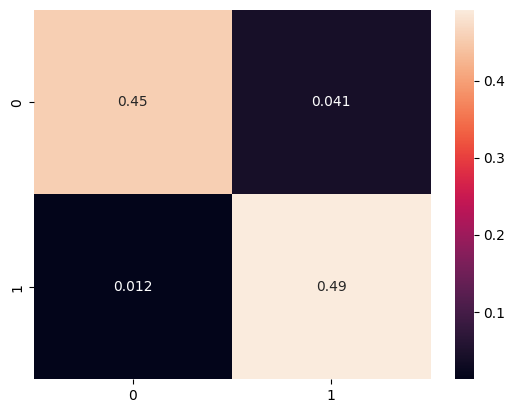

In [25]:
pred1 = rf.predict(x_test)
score1 = accuracy_score(y_test, pred1)
cn = confusion_matrix(y_test, pred1)
ax = plt.subplot()
sns.heatmap(cn / np.sum(cn), annot = True, ax=ax)
plt.plot()

In [26]:
print('Acccuracy of random forest: ',score1)
print(classification_report(y_test,pred1))
print('r2 Score :', r2_score(y_test, pred1))
print('Mean square error :', mean_squared_error(y_test,pred1))
print('Root mean square error:', sqrt(mean_squared_error(y_test,pred1)))
print('Mean absolute error:', mean_absolute_error(y_test,pred1))

Acccuracy of random forest:  0.946449795307479
              precision    recall  f1-score   support

           0       0.97      0.92      0.94     22522
           1       0.92      0.98      0.95     22912

    accuracy                           0.95     45434
   macro avg       0.95      0.95      0.95     45434
weighted avg       0.95      0.95      0.95     45434

r2 Score : 0.7857833971091706
Mean square error : 0.05355020469252102
Root mean square error: 0.23140917158254773
Mean absolute error: 0.05355020469252102


In [27]:
#metrics.plot_roc_curve(rf, x_test, y_test)
# metrics.roc_auc_score(y_test, pred1, average=None)

In [28]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
import sklearn.metrics
# metrics.plot_roc_curve (rf, x_test, y_test)
# metrics.roc_auc_score(y_test, pred1, average=None)

# **Decision Tree**

In [29]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

[]

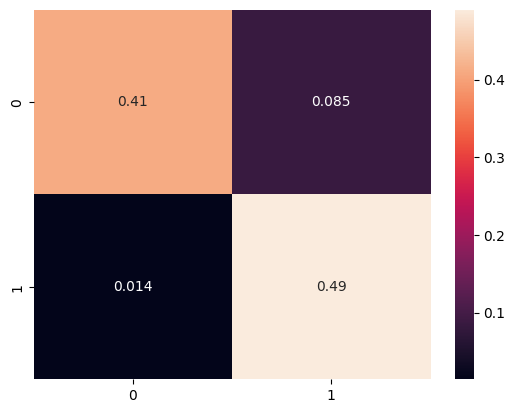

In [47]:
pred = model.predict(x_test)
score2 = accuracy_score(y_test, pred)
cn = confusion_matrix(y_test, pred)
ax = plt.subplot()
sns.heatmap(cn / np.sum(cn), annot = True, ax=ax)
plt.plot()

In [49]:
print('Acccuracy of decision tree: ',score2)
print(classification_report(y_test,pred))
print('r2 Score :', r2_score(y_test, pred))
print('Mean square error :', mean_squared_error(y_test,pred))
print('Root mean square error:', sqrt(mean_squared_error(y_test,pred)))
print('Mean absolute error:', mean_absolute_error(y_test,pred))

Acccuracy of decision tree:  0.9008011621252806
              precision    recall  f1-score   support

           0       0.97      0.83      0.89     22522
           1       0.85      0.97      0.91     22912

    accuracy                           0.90     45434
   macro avg       0.91      0.90      0.90     45434
weighted avg       0.91      0.90      0.90     45434

r2 Score : 0.6031754092770372
Mean square error : 0.09919883787471938
Root mean square error: 0.31495847007934136
Mean absolute error: 0.09919883787471938


#Logistic Regression

In [33]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

[]

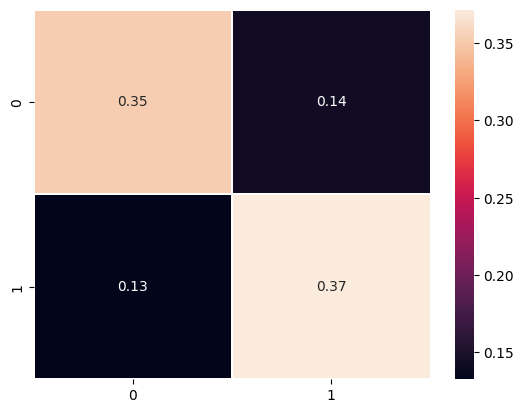

In [52]:
pred2 = logreg.predict(x_test)
score3 = accuracy_score(y_test, pred2)
cn = confusion_matrix(y_test, pred2)
ax = plt.subplot()
sns.heatmap(cn / np.sum(cn), annot = True, linewidths=.15, ax=ax)
plt.plot()

In [55]:
print('Acccuracy of logistic regression : ',score3)
print(classification_report(y_test,pred2))
print('r2 Score :', r2_score(y_test, pred2))
print('Mean square error :', mean_squared_error(y_test,pred2))
print('Root mean square error:', sqrt(mean_squared_error(y_test,pred2)))
print('Mean absolute error:', mean_absolute_error(y_test,pred2))

Acccuracy of logistic regression :  0.7236430866751772
              precision    recall  f1-score   support

           0       0.73      0.71      0.72     22522
           1       0.72      0.74      0.73     22912

    accuracy                           0.72     45434
   macro avg       0.72      0.72      0.72     45434
weighted avg       0.72      0.72      0.72     45434

r2 Score : -0.1055091105208612
Mean square error : 0.2763569133248228
Root mean square error: 0.5256965981674437
Mean absolute error: 0.2763569133248228


#K Neighbors

In [37]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

[]

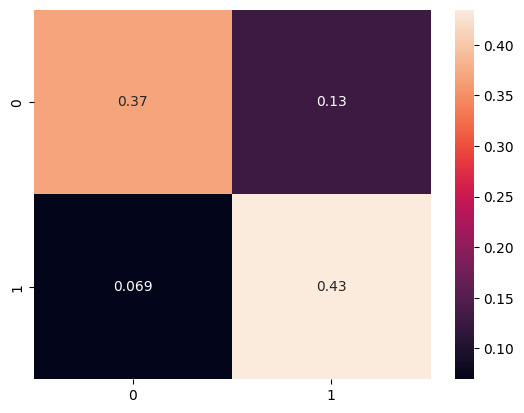

In [57]:
pred3 = knn.predict(x_test)
score4 = accuracy_score(y_test, pred3)
cn = confusion_matrix(y_test, pred3)
ax = plt.subplot()
sns.heatmap(cn / np.sum(cn), annot = True, ax=ax)
plt.plot()

In [59]:
print('Acccuracy of logistic regression : ',score4)
print(classification_report(y_test,pred3))
print('r2 Score :', r2_score(y_test, pred3))
print('Mean square error :', mean_squared_error(y_test,pred3))
print('Root mean square error:', sqrt(mean_squared_error(y_test,pred3)))
print('Mean absolute error:', mean_absolute_error(y_test,pred3))

Acccuracy of logistic regression :  0.8032970902848088
              precision    recall  f1-score   support

           0       0.84      0.74      0.79     22522
           1       0.77      0.86      0.82     22912

    accuracy                           0.80     45434
   macro avg       0.81      0.80      0.80     45434
weighted avg       0.81      0.80      0.80     45434

r2 Score : 0.21313038222961644
Mean square error : 0.19670290971519128
Root mean square error: 0.443512017554419
Mean absolute error: 0.19670290971519128


In [41]:
# from sklearn import svm
# model1 = svm.SVC()

In [42]:
#Wmodel1.fit(x_train, y_train)

In [43]:
# pred4 = model1.predict(x_test)
# score = accuracy_score(y_test, pred4)
# cn = confusion_matrix(y_test, pred4)
# ax = plt.subplot()
# sns.heatmap(cn / np.sum(cn), annot = True, ax=ax)
# plt.plot()
# score

#XG Boost

In [60]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

[]

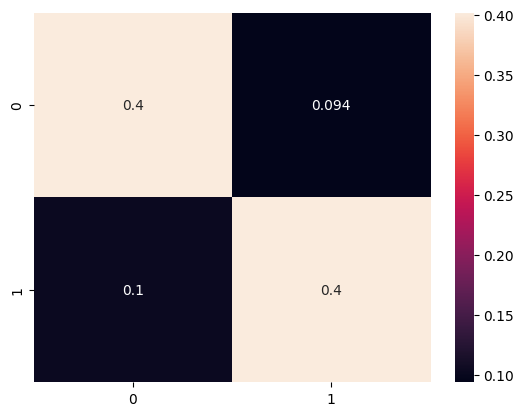

In [62]:
y_pred6 = xgb.predict(x_test)
score5 = accuracy_score(y_test, y_pred6)
cn = confusion_matrix(y_test, y_pred6)
ax = plt.subplot()
sns.heatmap(cn / np.sum(cn), annot = True, ax=ax)
plt.plot()

In [63]:
print('Acccuracy of logistic regression : ',score5)
print(classification_report(y_test,y_pred6))
print('r2 Score :', r2_score(y_test, y_pred6))
print('Mean square error :', mean_squared_error(y_test,y_pred6))
print('Root mean square error:', sqrt(mean_squared_error(y_test,y_pred6)))
print('Mean absolute error:', mean_absolute_error(y_test,y_pred6))

Acccuracy of logistic regression :  0.8034951798212793
              precision    recall  f1-score   support

           0       0.80      0.81      0.80     22522
           1       0.81      0.80      0.80     22912

    accuracy                           0.80     45434
   macro avg       0.80      0.80      0.80     45434
weighted avg       0.80      0.80      0.80     45434

r2 Score : 0.21392279876312137
Mean square error : 0.19650482017872078
Root mean square error: 0.44328864205923524
Mean absolute error: 0.19650482017872078


# Cat Boost

In [ ]:
pip install  catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.7/98.7 MB 131.8 MB/s eta 0:00:01

In [65]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier()
cat.fit(x_train, y_train)

Learning rate set to 0.094997
0:	learn: 0.6619866	total: 104ms	remaining: 1m 43s
1:	learn: 0.6367896	total: 143ms	remaining: 1m 11s
2:	learn: 0.6167619	total: 190ms	remaining: 1m 3s
3:	learn: 0.6005868	total: 230ms	remaining: 57.4s
4:	learn: 0.5875171	total: 271ms	remaining: 53.9s
5:	learn: 0.5766242	total: 314ms	remaining: 52s
6:	learn: 0.5668541	total: 356ms	remaining: 50.6s
7:	learn: 0.5590584	total: 402ms	remaining: 49.8s
8:	learn: 0.5532775	total: 442ms	remaining: 48.7s
9:	learn: 0.5477631	total: 483ms	remaining: 47.8s
10:	learn: 0.5421358	total: 525ms	remaining: 47.2s
11:	learn: 0.5381905	total: 564ms	remaining: 46.4s
12:	learn: 0.5347227	total: 609ms	remaining: 46.3s
13:	learn: 0.5315866	total: 650ms	remaining: 45.8s
14:	learn: 0.5284403	total: 692ms	remaining: 45.4s
15:	learn: 0.5255387	total: 735ms	remaining: 45.2s
16:	learn: 0.5236242	total: 774ms	remaining: 44.8s
17:	learn: 0.5214304	total: 817ms	remaining: 44.6s
18:	learn: 0.5193165	total: 858ms	remaining: 44.3s
19:	learn: 

[]

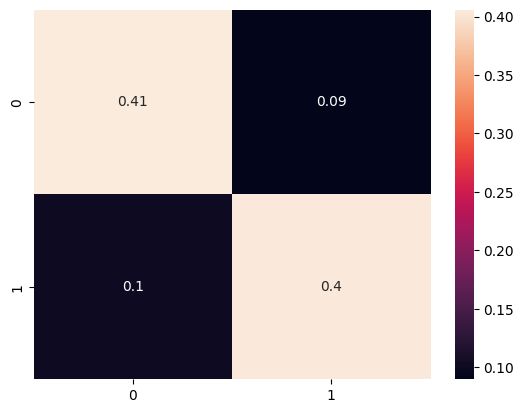

In [68]:
y_pred = cat.predict(x_test)
score6 = accuracy_score(y_test, y_pred)
cn = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cn / np.sum(cn), annot = True, ax=ax)
plt.plot()

In [70]:
print('Acccuracy of cat boost : ',score6)
print(classification_report(y_test,y_pred))
print('r2 Score :', r2_score(y_test, y_pred))
print('Mean square error :', mean_squared_error(y_test,y_pred))
print('Root mean square error:', sqrt(mean_squared_error(y_test,y_pred)))
print('Mean absolute error:', mean_absolute_error(y_test,y_pred))

Acccuracy of cat boost :  0.8101421842672888
              precision    recall  f1-score   support

           0       0.80      0.82      0.81     22522
           1       0.82      0.80      0.81     22912

    accuracy                           0.81     45434
   macro avg       0.81      0.81      0.81     45434
weighted avg       0.81      0.81      0.81     45434

r2 Score : 0.24051277577628638
Mean square error : 0.18985781573271118
Root mean square error: 0.4357267672896757
Mean absolute error: 0.18985781573271118


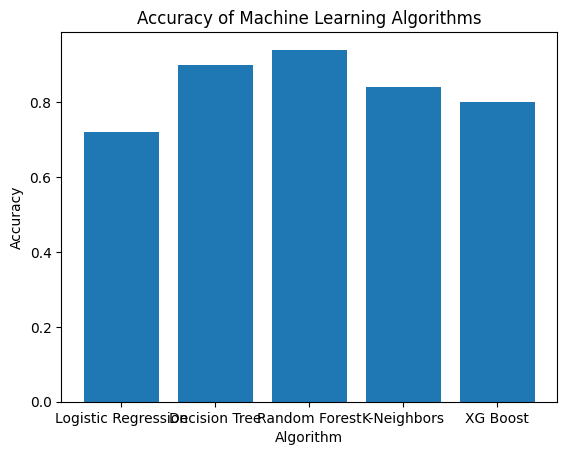

In [72]:
import matplotlib.pyplot as plt

# Define the names of the algorithms and their corresponding accuracies
algorithms = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Neighbors', 'XG Boost']
accuracies = [0.72, 0.90, 0.94, 0.84, 0.80]

# Create a bar chart of the accuracies
plt.bar(algorithms, accuracies)

# Set the title and axis labels
plt.title('Accuracy of Machine Learning Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')

# Show the chart
plt.show()

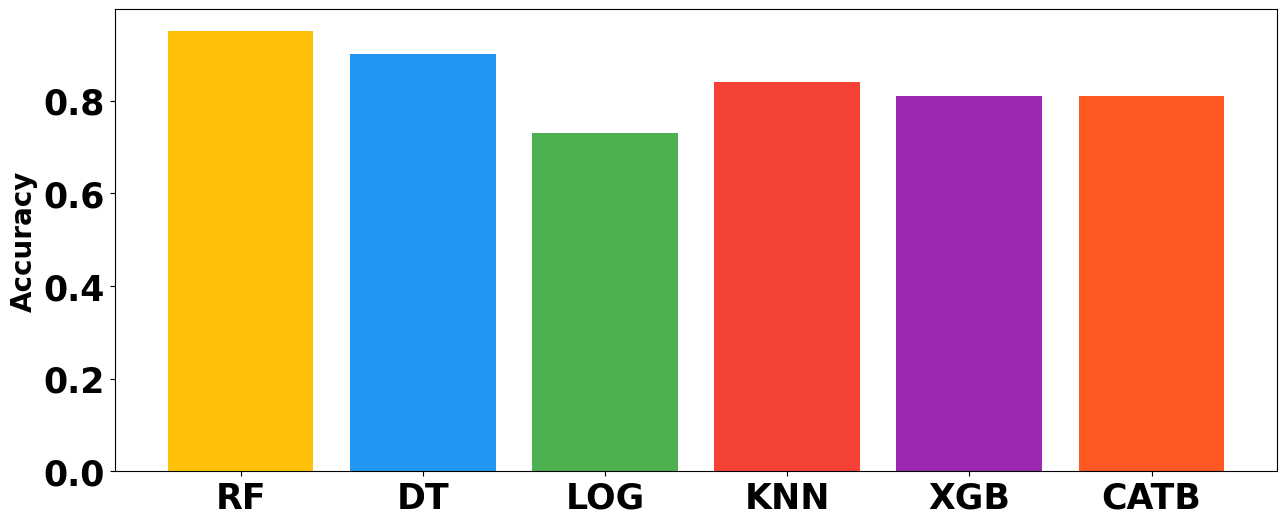

In [73]:
import matplotlib.pyplot as plt

# Data for the bar graph
algorithms = ['RF', 'DT', 'LOG', 'KNN', 'XGB', 'CATB']
accuracy_scores = [0.95,
0.90,
0.73,
0.84,
0.81,
0.81
]
# recall = np.array([0.98,
# 0.97,
# 0.74,
# 0.92,
# 0.80,
# 0.80
# ])
# precision = np.array([0.92,
# 0.85,
# 0.72,
# 0.79,
# 0.81,
# 0.81
# ])
# f1_score = np.array([0.95,
# 0.91,
# 0.73,
# 0.85,
# 0.80,
# 0.81
# ])

fig = plt.figure(figsize=(15, 6))

colors = ['#FFC107', '#2196F3', '#4CAF50', '#F44336', '#9C27B0', '#FF5722'] # List of colors for the bars


# Create a bar graph
plt.bar(algorithms, accuracy_scores, color=colors)

# Add labels and title
#plt.xlabel('Machine Learning Algorithms', weight='bold',fontsize=20)
plt.ylabel('Accuracy', weight='bold',fontsize=20)
#plt.title('Accuracy Scores of Six Machine Learning Algorithms')
#plt.suptitle('Performance Metrics of Machine Learning Algorithms', fontsize=20)
# Display the graph
plt.xticks(fontsize=25, weight='bold')
plt.yticks(fontsize=25,weight='bold')

plt.show()

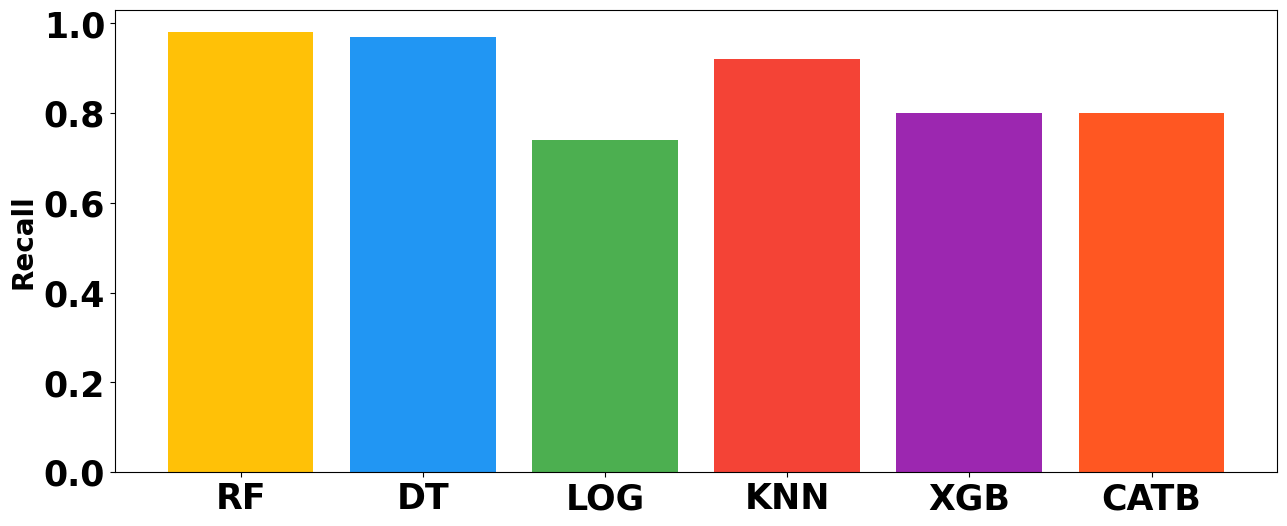

In [74]:
import matplotlib.pyplot as plt

# Data for the bar graph
algorithms = ['RF', 'DT', 'LOG', 'KNN', 'XGB', 'CATB']
# accuracy_scores = [0.94,
# 0.90,
# 0.72,
# 0.84,
# 0.80,
# 0.80
# ]
recall = [0.98,
0.97,
0.74,
0.92,
0.80,
0.80
]
# precision = np.array([0.92,
# 0.85,
# 0.72,
# 0.79,
# 0.81,
# 0.81
# ])
# f1_score = np.array([0.95,
# 0.91,
# 0.73,
# 0.85,
# 0.80,
# 0.81
# ])

fig = plt.figure(figsize=(15, 6))

colors = ['#FFC107', '#2196F3', '#4CAF50', '#F44336', '#9C27B0', '#FF5722'] # List of colors for the bars


# Create a bar graph
plt.bar(algorithms, recall, color=colors)

# Add labels and title
#plt.xlabel('Machine Learning Algorithms', weight='bold',fontsize=20)
plt.ylabel('Recall', weight='bold',fontsize=20)
#plt.title('Accuracy Scores of Six Machine Learning Algorithms')
#plt.suptitle('Performance Metrics of Machine Learning Algorithms', fontsize=20)
# Display the graph
plt.xticks(fontsize=25, weight='bold')
plt.yticks(fontsize=25,weight='bold')

plt.show()

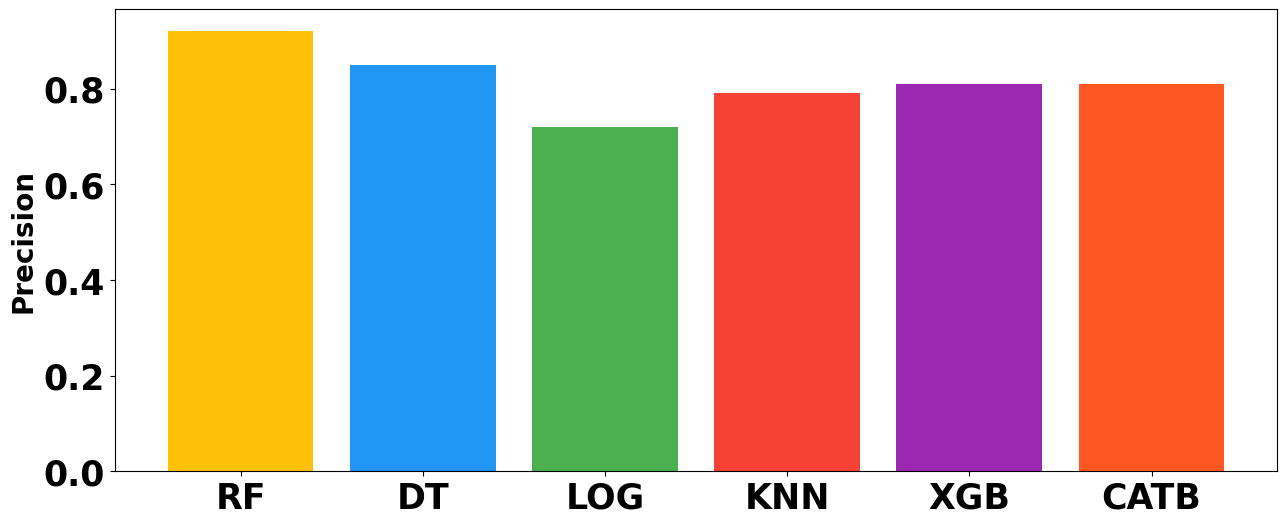

In [75]:
import matplotlib.pyplot as plt

# Data for the bar graph
algorithms = ['RF', 'DT', 'LOG', 'KNN', 'XGB', 'CATB']
# accuracy_scores = [0.94,
# 0.90,
# 0.72,
# 0.84,
# 0.80,
# 0.80
# ]
# recall = [0.98,
# 0.97,
# 0.74,
# 0.92,
# 0.80,
# 0.80
# ]
p1 = [0.92,
0.85,
0.72,
0.79,
0.81,
0.81
]
# f1_score = np.array([0.95,
# 0.91,
# 0.73,
# 0.85,
# 0.80,
# 0.81
# ])

fig = plt.figure(figsize=(15, 6))

colors = ['#FFC107', '#2196F3', '#4CAF50', '#F44336', '#9C27B0', '#FF5722'] # List of colors for the bars


# Create a bar graph
plt.bar(algorithms, p1, color=colors)

# Add labels and title
#plt.xlabel('Machine Learning Algorithms', weight='bold',fontsize=20)
plt.ylabel('Precision', weight='bold',fontsize=20)
#plt.title('Accuracy Scores of Six Machine Learning Algorithms')
#plt.suptitle('Performance Metrics of Machine Learning Algorithms', fontsize=20)
# Display the graph
plt.xticks(fontsize=25, weight='bold')
plt.yticks(fontsize=25,weight='bold')

plt.show()

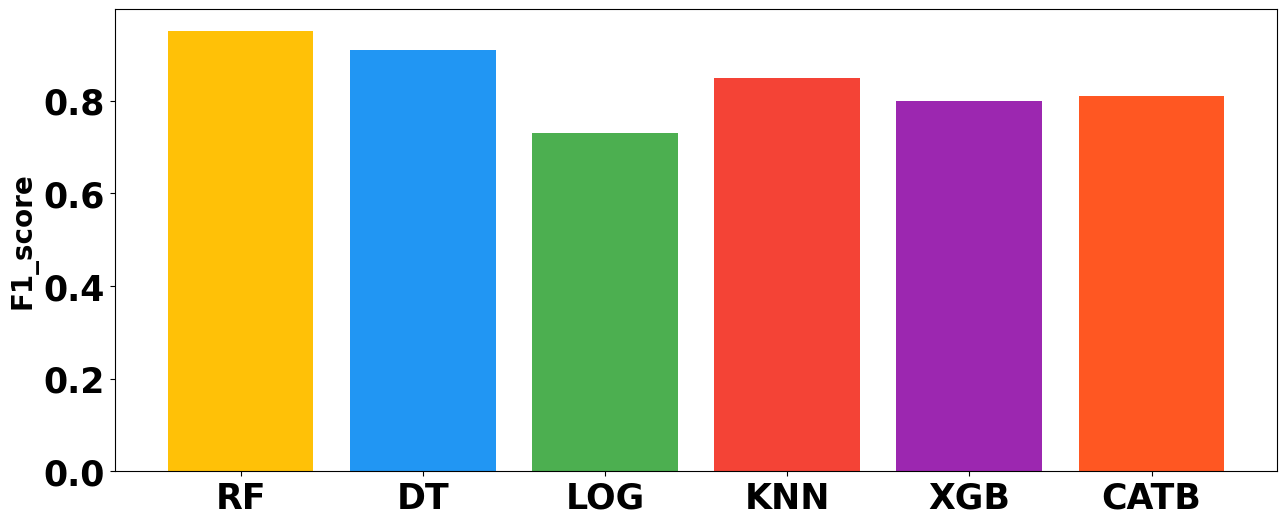

In [76]:
import matplotlib.pyplot as plt

# Data for the bar graph
algorithms = ['RF', 'DT', 'LOG', 'KNN', 'XGB', 'CATB']

f1_score = [0.95,
0.91,
0.73,
0.85,
0.80,
0.81
]

fig = plt.figure(figsize=(15, 6))

colors = ['#FFC107', '#2196F3', '#4CAF50', '#F44336', '#9C27B0', '#FF5722'] # List of colors for the bars


# Create a bar graph
plt.bar(algorithms, f1_score, color=colors)

# Add labels and title
#plt.xlabel('Machine Learning Algorithms', weight='bold',fontsize=20)
plt.ylabel('F1_score', weight='bold',fontsize=20)
#plt.title('Accuracy Scores of Six Machine Learning Algorithms')
#plt.suptitle('Performance Metrics of Machine Learning Algorithms', fontsize=20)
# Display the graph
plt.xticks(fontsize=25, weight='bold')
plt.yticks(fontsize=25,weight='bold')

plt.show()